<a href="https://colab.research.google.com/github/Jeanne-mrq/projet-MLBBL/blob/main/Notebook_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
path = "https://raw.githubusercontent.com/Jeanne-mrq/projet-MLBBL/refs/heads/main/healthcare_synthetic_data.csv"
data <- read.csv(path)

In [4]:
library(readr, GGally, ggplot2, gridExtra)

Analyse Exploratoire

1. Commencez par vérifier la nature des différentes variables et leur encodage. N’oubliez pas de convertir toutes les variables qualitatives.

In [5]:

print(str(data))

#Mise en forme quanti/quali
data$Gender <- as.factor(data$Gender)
data$Smoking_Status <- as.factor(data$Smoking_Status)
data$Family_History <- as.factor(data$Family_History)
data$Physical_Activity_Level <- as.factor(data$Physical_Activity_Level)
data$Alcohol_Consumption <- as.factor(data$Alcohol_Consumption)
data$Heart_Disease_Risk <- as.factor(data$Heart_Disease_Risk)
data$Sleep_Hours <- as.factor(data$Sleep_Hours)
data$Stress_Level <- as.factor(data$Stress_Level)


'data.frame':	15000 obs. of  19 variables:
 $ Patient_ID             : chr  "PID-00001" "PID-00002" "PID-00003" "PID-00004" ...
 $ Age                    : int  60 53 62 73 52 52 73 64 49 61 ...
 $ Gender                 : int  0 0 1 1 1 0 0 0 0 1 ...
 $ Height_cm              : num  147 162 175 173 179 ...
 $ Weight_kg              : num  51.3 76.6 92.4 68.9 79.8 ...
 $ BMI                    : num  23.8 29.3 30.3 22.9 25 23.7 25 34.5 28.2 36.3 ...
 $ Systolic_BP            : int  140 128 141 136 122 134 149 129 139 131 ...
 $ Diastolic_BP           : int  89 81 100 96 80 92 98 90 91 91 ...
 $ Cholesterol_Total      : int  217 203 173 193 236 225 260 237 227 206 ...
 $ Cholesterol_LDL        : int  151 119 124 117 153 155 166 160 138 139 ...
 $ Cholesterol_HDL        : int  52 38 45 45 41 48 46 44 37 38 ...
 $ Fasting_Blood_Sugar    : int  83 116 90 81 79 103 103 108 90 103 ...
 $ Smoking_Status         : int  0 0 0 0 0 0 0 0 1 0 ...
 $ Alcohol_Consumption    : int  1 0 0 0 1 0 0 1 0 

ERROR: Error: object 'a' not found


2. Commencez l’exploration par une analyse descriptive unidimensionnelle des données. Des transformations des variables quantitatives vous semblent-t-elles pertinentes ?




In [6]:


plot_quantitative <- function(df) {
  vars_num <- names(df)[sapply(df, is.numeric)]

  plots <- lapply(vars_num, function(v) {
    ggplot(df, aes(x = .data[[v]])) +
      geom_histogram(aes(y = after_stat(density)),
                     bins = 30,
                     fill = "grey80",
                     color = "black") +
      geom_density(alpha = 0.2, color = "blue") +
      labs(title = v, x = v, y = "Density") +
      theme_minimal()
  })

  do.call(grid.arrange, c(plots, ncol = 3))
}

plot_quantitative(data)

ERROR: Error in library(gridExtra): there is no package called ‘gridExtra’


3. Poursuivez avec une analyse descriptive bidimensionnelle. Utilisez des techniques de visualisation: par exemple les nuages de points (scatterplot), des graphes des corrélations, des boîtes à moustaches parallèles,mosaicplot... Quelles variables semblent liées ?


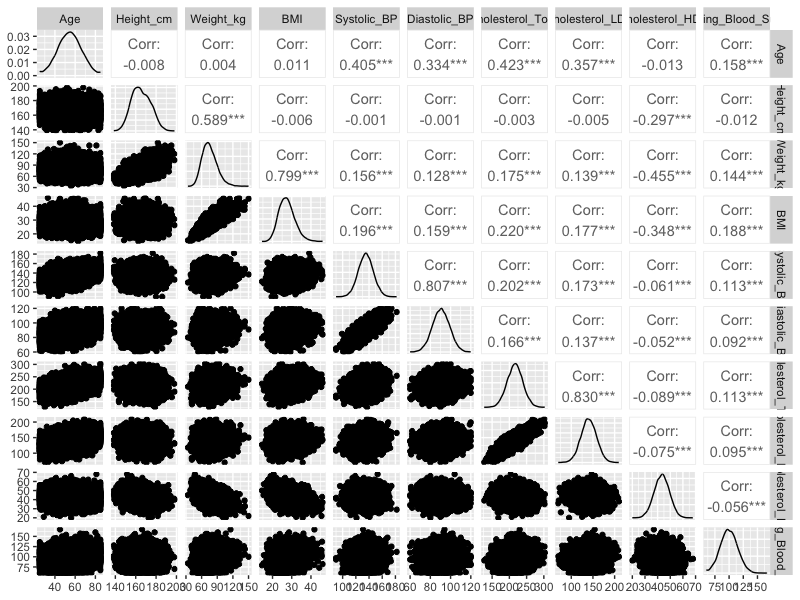

corrplot 0.95 loaded


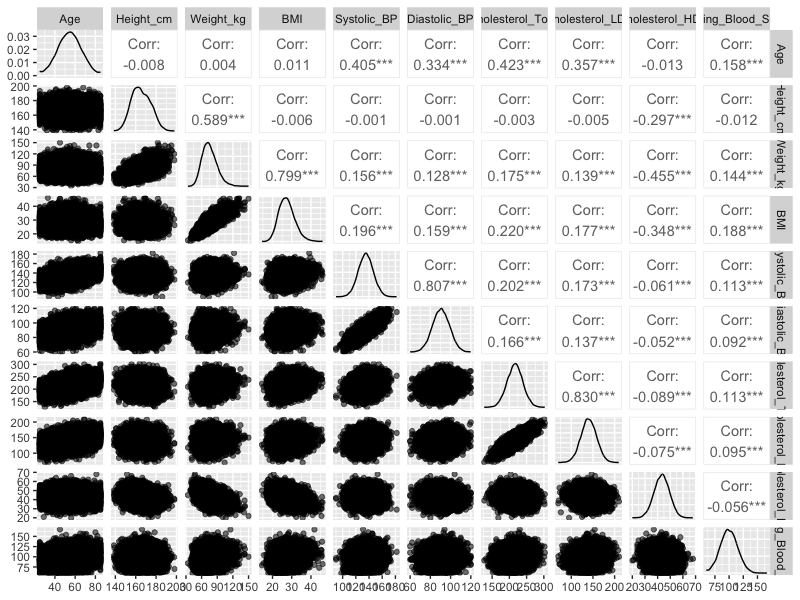

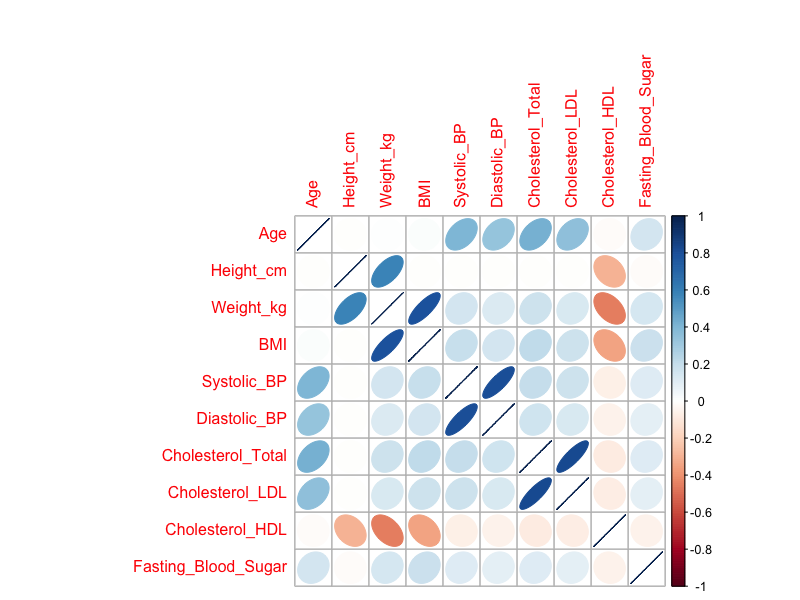

In [ ]:
vars_num <- names(data)[sapply(data, is.numeric)]

ggpairs(data[, vars_num])

vars_num <- names(data)[sapply(data, is.numeric)]

ggpairs(
  data,
  columns = vars_num,
  aes(alpha = 0.6)
)

library(corrplot)
corrplot(cor(data[, vars_num]),method="ellipse")